In [1]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), "IO"))
sys.path.append(os.path.join(os.getcwd(), "Display"))

from IO.classes import CypherBatch, CypherFile, TifFile, GwyFile
from Display.figures import FigureSinglePlot, FigureSubplots
import hystorian as hy
import numpy as np
import pandas as pd

import h5py
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

#Fix packages to figure out this. 
###TODO: Issue with h5py. Possibly due to hyperspy

In [145]:
import os
import sys
import matplotlib.pyplot as plt
cmd = os.path.dirname(sys.path[0])
import gwyfile as gwy

obj = gwy.load(os.path.join(cmd, "2023.08.23_0.gwy"))
channels = gwy.util.get_datafields(obj)


# channel = channels['Test']
# Datafield objects have a `data` property to access their
# two-dimensional data as numpy arrays.
# data = channel.data

print(channels.keys())

print(channels["1F:Mag1 (11)"])

datafield = channels["1F:Mag1 (11)"]
data = datafield.data
xres = datafield.si_unit_z
print(xres.unitstr)



cypher_object = gwy.load(os.path.join(cmd, "v7_cAFM_newtip0000.gwy"))
channels = gwy.util.get_datafields(cypher_object)
print(channels["HeightRetrace"].data.shape)
print(channels)


dict_keys(['1F:Height (1)', '1F:Height (2)', '1F:Mag1 (11)', '1F:Phase1 (12)', '1F:Height (13)', '1F:Ext1 (14)', '1F:Ext2 (15)', '1F:Ext3 (16)', '1F:Iprobe (17)', '1B:Ext2 (18)', '1B:Ext3 (19)', '1F:Height (20)', '1B:Height (3)', '1F:Height (21)', '1F:Ext1 (22)', 'Decibel  (23)', 'None Window (24)', '1F:Mag1 (29)', '1F:Phase1 (30)', '1B:Iprobe (31)', '1B:Height (4)', '1B:Ext2 (32)', '1B:DFL (33)', '1F:Height (34)', '1F:Height (35)', '1F:DFL (36)', '1F:Height (5)', '1F:Height (6)', '1B:Height (7)', '1B:Height (8)', '1F:Height (9)', '1F:Height (10)'])
<GwyObject "GwyDataField">('xres', 'yres', 'xreal', 'yreal', 'si_unit_xy', 'si_unit_z', 'data')
A
(438, 512)
{'HeightRetrace': GwyDataField([('xres', 512), ('yres', 438), ('xreal', 2.104109589041096e-05), ('yreal', 1.8e-05), ('si_unit_xy', GwySIUnit([('unitstr', 'm')])), ('si_unit_z', GwySIUnit([('unitstr', 'm')])), ('data', array([-1.42010776e-08, -1.40871634e-08, -1.39627332e-08, ...,
        1.23954464e-08,  1.25064048e-08,  1.26315740e-

Height_Backward_0
Deflection_Backward_1
ZSensor_Backward_2
Current_Forward_3
Current_Backward_4
Current_Backward_5
(438, 512)


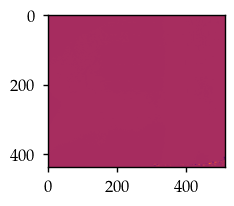

In [125]:
obj = GwyFile(cmd, "v7_cAFM_newtip0000")
obj()

datas = obj["DFL B:"]

print(datas[0].shape)

plt.imshow(datas[0])
plt.show()



[[ 1280  1024  9984 ... 17920 13056 10240]
 [    0     0  1536 ... 22272 10240  6912]
 [  512   512   512 ... 42752 19200  2048]
 ...
 [64512     0     0 ...     0     0 64512]
 [64512     0     0 ...     0     0 64512]
 [64512 64512 64512 ... 64512 64512 64512]]


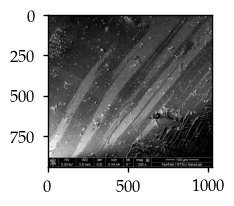

In [136]:
# cmd = os.path.dirname(sys.path[0])
# from PIL.ExifTags import TAGS

# sem = TifFile(path=cmd, filename="4_007")
# sem_img = sem()
# # sem_img = sem[None]

# # for key in sem_img.tag:
# #     print(TAGS[key])


# # print(sem_img)
# plt.imshow(np.array(sem_img)[:750,:], cmap="gray")
# plt.show()

import tiffile
import os
import sys
import matplotlib.pyplot as plt
cmd = os.path.dirname(sys.path[0])

pic = tiffile.imread(os.path.join(cmd,"4_007.tif"))
print(pic)
plt.imshow(pic, cmap="gray")
plt.show()

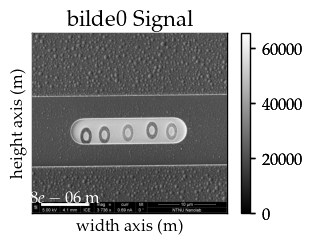

In [20]:
import tifffile
pic0 = tifffile.TiffFile(os.path.join(cmd,"bilde0.tif"))

import hyperspy.api as hs


hspic = hs.load(os.path.join(cmd,"bilde0.tif"))

file successfully converted


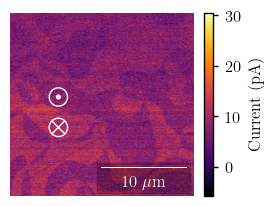

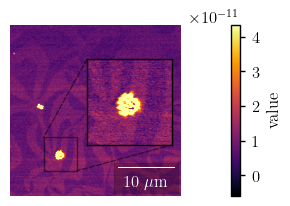

0.1295535613077899 0.12164395726039556
0.0 0.0 1.0 1.0
0.15881129429930807 0.12164395726039556
0.0 0.0 1.0 1.0
0.09913663821813484 0.12164395726039556
0.0 0.0 1.0 1.0
0.15881129429930763 0.12164395726039556
0.0 0.0 1.0 1.0


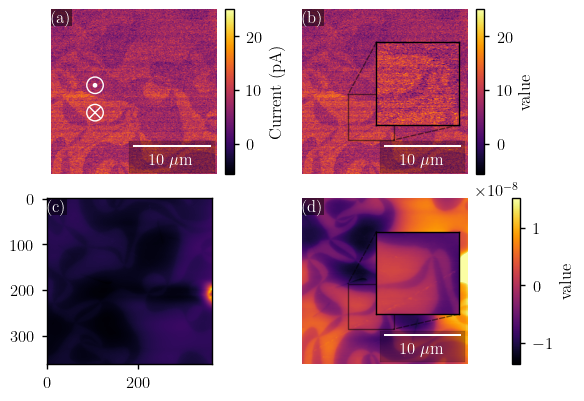

In [40]:
cmd = os.path.dirname(sys.path[0])
datafile = CypherFile(path=cmd, filename = 'sample_89M10000')
datafile()
from Display import attributes as attr

alt_data = datafile['CR'][150:,150:]
figure = FigureSinglePlot(datafile, show=True, path=cmd, filename='developing', extension='.pdf',  vmax_std = 10)
figure.Ax.plot_cAFM(datafile, key='CR', values = alt_data)
figure.Ax.ax = attr.add_polarization_direction(figure.Ax.ax, type="out", pos=(95,195)) #TODO: Possibly give position as function of ax.trans. But will not fix the problem. 
figure.Ax.ax = attr.add_polarization_direction(figure.Ax.ax, type="in", pos=(95,135))
figure()

inset_kwargs ={
                "x1": 100,
                "y1": 75,
                "x2": 200,
                "y2": 175,
                "left_x": 0.45,
                "left_y": 0.3,
                "width": 0.5,
                "height": 0.5,
                "indicate": True,
            }

inset_fig = FigureSinglePlot(datafile, show=True, path=cmd, filename='inset', extension='.pdf',  vmax_std = 10)
inset_fig.Ax.plot_inset(datafile, key= "CR",  **inset_kwargs) 
inset_fig()



subtest = FigureSubplots(datafile, show=True, path=cmd, filename='subplots', extension='.pdf', vmax_std = 5, ncols=2, nrows = 2)
ax0 = subtest.create_subplot(0,0)
ax1 = subtest.create_subplot(0,1, sharey=ax0)
ax0.plot_cAFM(datafile, key='CR', values = alt_data)
ax1.plot_inset(datafile, key='CR',**inset_kwargs, values = alt_data*1e12,)

ax2 = subtest.create_subplot(1,0, vmax_std = 2)
ax3 = subtest.create_subplot(1,1, sharey=ax2, vmax_std = 2)
ax2.ax.imshow(datafile['HR'][150:,150:])
ax3.plot_inset(datafile, key='HR',**inset_kwargs, values = datafile['HR'][150:,150:],)


attr.add_polarization_direction(ax0.ax, type="out", pos=(95,195))
attr.add_polarization_direction(ax0.ax, type="in", pos=(95,135))
subtest.label_subplots(formatter=2, pad=0)

subtest()


In [64]:
from PIL import Image

test_NT = CypherFile(cmd, "2023.08.15_0")
with open(os.path.join(test_NT.path, test_NT.filename + ".xyz"), "r") as f:
    arr = pd.read_csv(f, sep="\t", header=None, index_col=None)

    pil = Image.open(os.path.join(test_NT.path, test_NT.filename + ".tiff"))


import matplotlib.pyplot as plt


x_dim = set(arr[0]).__len__()
y_dim = set(arr[1]).__len__()

print(x_dim)
print(y_dim)

print(arr[1].max())

# arr = arr[2].values.reshape((y_dim, x_dim))
x = np.linspace(0, arr[0].max(), x_dim) 
y = np.linspace(0, arr[1].max(), y_dim)


arr = arr[2].reshape(y_dim, x_dim)
plt.imshow(arr)

plt.colorbar()
plt.axis("off")
plt.show()

256
108
4.1767e-06


AttributeError: 'Series' object has no attribute 'reshape'

In [182]:

cmd = os.path.dirname(sys.path[0])
test = CypherFile(path=cmd, filename = 'sample_89M10000')

In [3]:
test()

file successfully converted


In [4]:
data = h5py.File(os.path.join(cmd,'sample_89M10000.hdf5'), "r")

In [5]:
def get_dataset_keys(f):
    keys = []
    f.visit(lambda key: keys.append(key) if isinstance(f[key], h5py.Dataset) else None)
    return keys

In [6]:
print(get_dataset_keys(data))

['datasets/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000/Current2Retrace', 'datasets/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000/CurrentRetrace', 'datasets/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000/CurrentTrace', 'datasets/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000/DeflectionRetrace', 'datasets/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000/HeightRetrace', 'datasets/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000/ZSensorRetrace', 'metadata/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000']


In [59]:
# dat1 = data['datasets/c:\\Users\rubensd\OneDrive - NTNU\PhD\Analysis\sample_89M10000/CurrentRetrace']
met1 = data['metadata/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000']


In [185]:
import pandas as pd
arr = np.zeros(1)
with h5py.File(os.path.join(cmd,'sample_89M10000.hdf5'), "r") as f:
    met1 = f['metadata/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000']
    # print(met1.attrs())
    arr = np.array(met1)#np.array(met1)#met1.attrs['Scan size'
    # ss = met1.attrs['ScanSize']

    # ss = met1.get('ScanSize')
    # print(arr.decode('utf-8'))
    # print(ss)

testb = np.array(b'Hello')

strng= arr.tolist().decode('ascii', errors='replace')

lists = strng.split('\r')
# print(lists)

df = pd.DataFrame([sub.split(":") for sub in strng.split("\r")])


# print(df.iloc[:50,:2])

print(test.get_metadata())


AttributeError: 'Dataset' object has no attribute 'tolist'